In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/other_train.csv",index_col=0)
len(data)

3983

### V subore other_train.csv sa nachadza 3983 zaznamov

In [3]:
person = pd.read_csv("./data/personal_train.csv")
len(person)

3933

### V subore personal_train.csv sa nachadza 3933 zaznamov

In [4]:
import json
# Vyvorenie pola do kt. pojdu vsetky parsnute JSONy
dict_array = []
# Nulovy JSON
string = '{"mean_glucose":0,"std_glucose":0,"kurtosis_glucose":0,"skewness_glucose":0,"mean_oxygen":0,"std_oxygen":0,"kurtosis_oxygen":0,"skewness_oxygen":0}'
# Nacitanie JSON parsnutie ' na " a nahradenie nulovych hodnot v medical info
data.medical_info.apply(lambda x: dict_array.append(json.loads(x.replace("'","\"").replace(":\"",":").replace("\",",",").replace("\"}","}") if isinstance(x,str) else string)))
medical_datas = pd.DataFrame(dict_array)

# Pridanie novych stlpcov do povodneho DataFramu, pricom vsetky vieme zmenit na float
for item in medical_datas:
    data[item] = medical_datas[item].astype(float)
    
len(data.columns)
data

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Clarence Rodriguez,"6931 Anthony Island\r\nTaylorland, NH 14540",White,Married-civ-spouse,Craft-repair,f,9.0,Husband,0.0,HS-grad,...,0.0,Private,117.507812,40.788516,0.125276,0.773516,2.785953,16.660218,8.165360,82.956766
1,Manuel Boyd,"50488 Timothy Knolls\r\nNorth Brittanyborough,...",Black,Never-married,Sales,f,10.0,Own-child,0.0,Some-college,...,0.0,??,16.539062,42.744865,3.968126,15.398741,109.183110,53.137096,0.871271,0.488218
2,Charles Arthur,"247 Johnson Roads Apt. 514\r\nPort Sarahton, W...",White,Married-civ-spouse,Handlers-cleaners,F,10.0,Husband,0.0,Some-college,...,0.0,Private,126.617188,49.077764,0.193887,0.162133,2.232441,15.860211,8.937473,95.093257
3,Carl Dobransky,"102 Taylor Trace\r\nNew Jennifer, RI 87597",White,Never-married,Exec-managerial,f,13.0,Not-in-family,0.0,Bachelors,...,0.0,Private,132.773438,45.895808,0.201450,0.087837,0.522575,9.779098,20.979174,474.263227
4,Thomas Oconnor,USNV Skinner\r\nFPO AE 19822,White,Married-civ-spouse,Craft-repair,FALSE,7.0,Husband,0.0,11th,...,0.0,Private,100.656250,45.964225,0.350437,0.282474,10.305184,38.965850,3.937302,15.001139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Michael Gibbs,"16431 Nelson Estate\r\nEast Samanthaberg, MN 6...",White,Never-married,Farming-fishing,f,9.0,Unmarried,0.0,HS-grad,...,0.0,Self-emp-not-inc,92.031250,39.015609,0.694631,1.746994,2.987458,16.477481,7.788552,76.894261
3979,Ronald Nolasco,"588 Timothy Field\r\nSteveville, TX 56369",NaN,NaN,Exec-managerial,NaN,13.0,Not_in_family,0.0,Bachelors,...,NaN,Private,172.562500,43.713154,-0.921974,1.363436,96.241639,104.775493,0.424477,-1.619877
3980,Daniel Bell,"78234 Emily Oval\r\nPort Michaelport, OR 24683",White,Married-civ-spouse,Craft-repair,f,12.0,Husband,0.0,Assoc-acdm,...,0.0,Private,118.273438,50.283993,0.044799,-0.108468,4.069398,19.225411,6.443271,52.803754
3981,Joshua Goodwin,"PSC 4150, Box 2967\r\nAPO AA 04681",White,Never-married,Prof-specialty,FALSE,13.0,Not-in-family,0.0,Bachelors,...,0.0,Private,123.960938,56.225606,0.290871,-0.392737,2.253344,17.119349,8.930296,90.443459


In [5]:
# Vytvoremoe noveho suboru aby sme parsovat nemuseli zakazdym

data = data.drop(columns=['medical_info'])
data.to_csv("modify_other_train.csv")

In [18]:
# Zistenie skutocneho Datoveho typu stlpcov
for item in data:
    print("{} type return {}".format(item,type(data[item][0])))
    
print('\n')
    
# Typ kt. nam vypise pandas
data.info()

name type return <class 'str'>
address type return <class 'str'>
race type return <class 'str'>
marital-status type return <class 'str'>
occupation type return <class 'str'>
pregnant type return <class 'str'>
education-num type return <class 'numpy.float64'>
relationship type return <class 'str'>
capital-gain type return <class 'numpy.float64'>
education type return <class 'str'>
fnlwgt type return <class 'numpy.float64'>
class type return <class 'numpy.float64'>
income type return <class 'str'>
native-country type return <class 'str'>
hours-per-week type return <class 'numpy.float64'>
capital-loss type return <class 'numpy.float64'>
workclass type return <class 'str'>
mean_glucose type return <class 'numpy.float64'>
std_glucose type return <class 'numpy.float64'>
kurtosis_glucose type return <class 'numpy.float64'>
skewness_glucose type return <class 'numpy.float64'>
mean_oxygen type return <class 'numpy.float64'>
std_oxygen type return <class 'numpy.float64'>
kurtosis_oxygen type ret

### Subor other_train.csv obsahuje 25 atributov pricom 14 z nich je float64(numpy) a 11 z nich su objekty(str)


In [7]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
Unnamed: 0       3933 non-null int64
name             3933 non-null object
address          3933 non-null object
age              3540 non-null float64
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 184.5+ KB


### Subor person_train.csv obsahuje 6 atributov pricom 1 z nich je float64(numpy) a 4 z nich su objeckty(str) a 1 je datum

In [8]:
# Vypis vsetky deskriptyvnych statistik
data.describe(include="all")

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3983,3983,3970,3965,3962,3961,3962.00000,3967,3970.000000,3967,...,3969.000000,3683,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000
unique,3933,3933,5,6,15,6,NaN,9,NaN,16,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,James Menzies,"455 Amber Freeway\r\nWest Timothyland, RI 32037",White,Married-civ-spouse,Craft-repair,f,NaN,Husband,NaN,HS-grad,...,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,3,3398,1830,547,3494,NaN,1615,NaN,1306,...,NaN,2518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,10.05477,NaN,1240.338539,NaN,...,91.746536,NaN,100.813059,44.952091,0.946830,4.202553,18.388082,31.014362,7.377900,90.889854
std,NaN,NaN,NaN,NaN,NaN,NaN,2.58377,NaN,8300.936903,NaN,...,412.307694,NaN,34.235192,8.203270,1.609436,9.657077,34.717117,22.342098,4.828623,108.481276
min,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,0.000000,NaN,...,0.000000,NaN,0.000000,0.000000,-1.641515,-1.755332,0.000000,0.000000,-2.597872,-1.976976
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.00000,NaN,0.000000,NaN,...,0.000000,NaN,87.292969,40.050403,0.067006,-0.118707,2.050167,14.999759,3.562240,11.840094
50%,NaN,NaN,NaN,NaN,NaN,NaN,10.00000,NaN,0.000000,NaN,...,0.000000,NaN,110.570312,45.820717,0.308703,0.369527,3.209866,20.400828,7.760264,68.127714
75%,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,NaN,0.000000,NaN,...,0.000000,NaN,124.128906,50.334942,0.770071,2.074858,12.604515,43.109566,10.258696,126.817691


### Pacienti ktory maju, nemaju a nevieme o ich chorobe (class atribut)

In [19]:
# Zistenie pocet pacientov s chorobou
print("Patients who have diseases ",len(data.loc[data['class'] == 1]))
print("Patients who have not diseases ",len(data.loc[data['class'] == 0]))
print("Patients that we dont know if they have or not",len(data.loc[data['class'] != 1].loc[data['class'] != 0]))
print("All patients ",len(data))

Patients who have diseases  1010
Patients who have not diseases  2956
Patients that we dont know if they have or not 17
All patients  3983


### Histogramy jednotlivych hodnote, kt sme ziskali z medical info

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9B7A2B70>]],
      dtype=object)

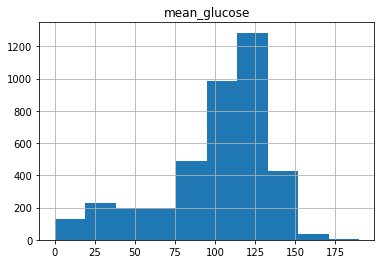

In [10]:
data.hist('mean_glucose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9B7A2780>]],
      dtype=object)

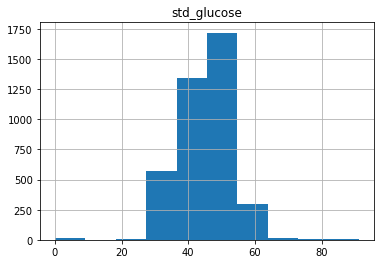

In [11]:
data.hist('std_glucose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9BB58CF8>]],
      dtype=object)

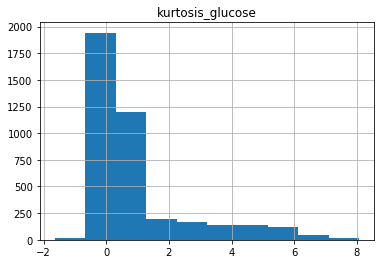

In [12]:
data.hist('kurtosis_glucose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9BBEE048>]],
      dtype=object)

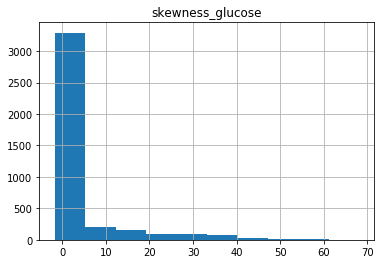

In [13]:
data.hist('skewness_glucose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9BC758D0>]],
      dtype=object)

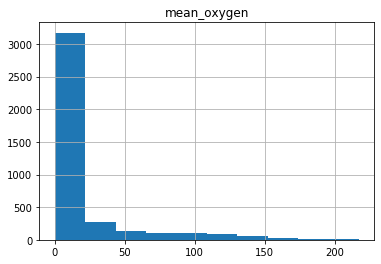

In [14]:
data.hist('mean_oxygen')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9BBEEBA8>]],
      dtype=object)

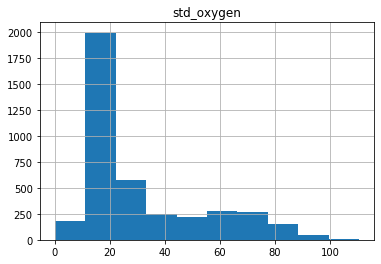

In [15]:
data.hist('std_oxygen')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9BD6FC50>]],
      dtype=object)

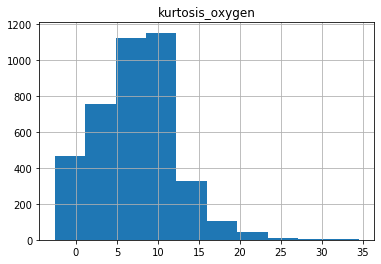

In [16]:
data.hist('kurtosis_oxygen')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD9BCC0320>]],
      dtype=object)

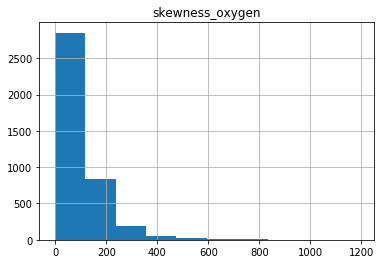

In [17]:
data.hist('skewness_oxygen')
